Number of spikes: [22 21 22 22 22 21 22 21 22 22 22 22 22 22 22 22 22 21 22 22 22 22 22 21 22
 22 22 21 22 21 22 21 22 22 22 22 22 21 21 22 22 22 22 21 21 21 22 22 21 22
 22 21 21 21 21 22 22 22 22 21 21 21 22 21 22 22 22 21 22 21 22 21 21 22 22
 22 22 21 21 21 21 22 22 21 22 22 22 22 21 22 21 21 22 21 22 22 22 22 22 21
 21 21 22 22 22 22 21 22 21 22 22 21 22 21 22 22 21 22 22 22 21 22 21 22 22
 22 22 21 21 21 22 22 22 21 22 22 22 22 21 21 21 21 22 22 22 21 21 22 22 22
 21 21 21 21 22 22 21 21 22 22 22 22 22 21 21 21 21 22 22 22 21 22 22 22 22
 21 22 22 21 22 22 21 21 22 21 21 22 21 21 21 22 22 22 22 22 21 22 22 22 21
 22 22 22 22 21 22 21 21 22 22 21 21 22 21 22 22 22 21 22 21 21 21 21 22 22
 22 22 22 21 22 22 22 22 21 22 22 22 22 21 22 22 22 21 21 21 22 22 21 22 22
 22 21 21 22 21 21 21 21 22 21 22 21 22 22 22 22 22 21 22 22 22 21 21 22 22
 22 22 21 22 22 21 22 22 22 21 22 21 22 22 22 22 21 22 21 22 22 22 22 22 22
 21 22 21 21 22 22 22 21 21 21 22 22 21 22 21 22 22 21 22 21 22 22 22 

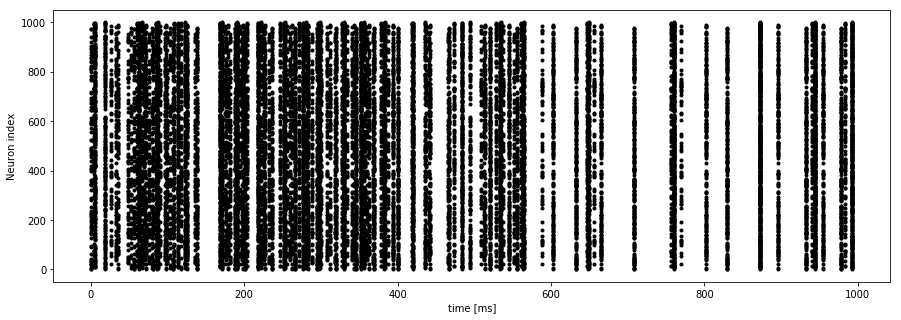

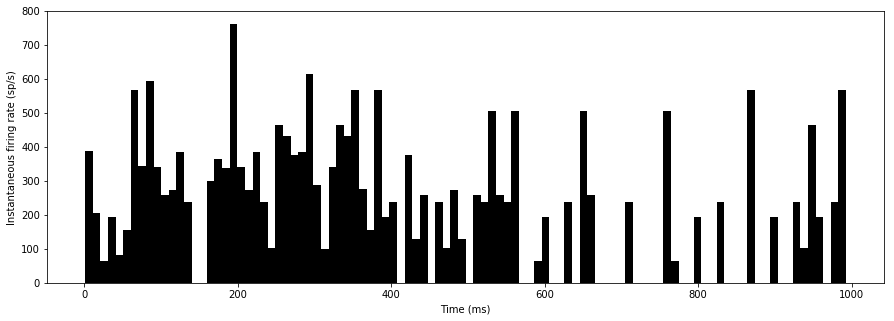

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 1000*ms
num_inputs = 20
rates = '(12*Hz+6*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 1000

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

print("Number of spikes: %s" % spikemon.count[:])
print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(spikemon.t/b2.ms, spikemon.i, '.k')
xlabel('time [ms]')
ylabel('Neuron index')

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms,100, facecolor='k')
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');




[  1.8   1.8   1.8   1.8   1.8   1.8   1.8   1.8   1.8   1.8   4.6   4.6
   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   6.2   6.2   6.2   6.2
   6.2   6.2   6.2   6.2   6.2   6.2   8.4   8.4   8.4   8.4   8.4   8.4
   8.4  10.8  10.8  10.8  10.8  10.8  10.8  10.8  10.8  16.8  16.8  16.8
  16.8  16.8  16.8  16.8  16.8  17.4  17.4  17.4  17.4  17.4  17.4  17.4
  17.4  17.4  17.4  17.8  17.8  17.8  17.8  17.8  17.8  17.8  17.8  17.8
  17.8  18.9  18.9  18.9  18.9  18.9  18.9  18.9  18.9  18.9  18.9  18.9
  18.9  18.9  18.9  19.4  19.4  19.4  19.4  19.4  19.4  19.4  19.4  19.4
  19.4  19.4  19.8  19.8  20.1  20.1  20.1  20.1  20.1  20.1  20.1  20.1
  20.1  20.1  21.6  21.6  21.6  21.6  21.6  21.6  21.6  21.6  21.6  21.6
  23.1  23.1  23.1  23.1  23.1  23.1  23.1  23.1  23.1  23.1  23.1  23.1
  23.1  23.1  23.1  23.1  23.1  28.4  28.4  28.4  28.4  28.4  28.4  28.4
  28.4  28.6  28.6  28.6  28.6  28.6  28.6  28.6  28.6  29.8  29.8  29.8
  29.8  29.8  29.8  29.8  29.8  29.8  29.8  33.7  3

[ 203.6  203.6  203.6  203.6  203.6  203.6  203.6  203.6  203.6  203.6
  203.6  203.6  203.6  203.6  203.6  203.6  203.6  203.6  203.6  203.6
  203.6  203.6  203.6  204.6  204.6  204.6  204.6  204.6  204.6  204.6
  204.6  204.6  204.6  206.1  206.1  206.1  206.1  206.1  206.1  206.1
  206.1  206.1  206.1  206.1  206.1  206.1  206.1  206.1  206.1  206.1
  206.1  206.1  206.1  206.1  206.1  206.1  206.1  206.1  206.2  206.2
  206.2  206.2  206.2  206.2  206.2  206.2  210.9  210.9  210.9  210.9
  210.9  210.9  210.9  210.9  210.9  210.9  216.5  216.5  216.5  216.5
  216.5  216.5  216.5  216.5  216.5  216.5  216.5  216.5  216.5  216.5
  216.5  216.5  216.5  216.5  216.5  216.5  216.5  216.5  216.5  216.5
  221.4  221.4  221.4  221.4  221.4  221.4  221.4  221.4  221.4  221.4
  221.4  221.4  221.4  221.4  221.4  221.4  221.4  221.4  221.4  221.4
  221.4  221.4  221.4  222.6  222.6  222.6  222.6  222.6  222.6  222.6
  222.6  222.6  222.6  227.5  227.5  227.5  227.5  227.5  227.5  227.5
  227.

[ 0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528
  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528
  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528
  0.3528  0.3528  0.3528  0.3528  0.3528  0.3528  0.3541  0.3541  0.3541
  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541
  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541
  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541  0.3541
  0.3541  0.3541  0.3541  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547
  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547
  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547
  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547  0.3547
  0.3547  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611
  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611
  0.3611  0.3611  0.3611  0.3611  0.3611  0.3611  0

[ 0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002
  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002
  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002
  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5002  0.5172  0.5172
  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172
  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172
  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172  0.5172
  0.5172  0.5172  0.5172  0.5172  0.5252  0.5252  0.5252  0.5252  0.5252
  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252
  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252
  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252  0.5252
  0.5252  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278
  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278
  0.5278  0.5278  0.5278  0.5278  0.5278  0.5278  0

[ 0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051
  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051
  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051
  0.9051  0.9051  0.9051  0.9051  0.9051  0.9051  0.907   0.907   0.907
  0.907   0.907   0.907   0.907   0.907   0.907   0.907   0.907   0.907
  0.907   0.907   0.907   0.907   0.907   0.907   0.907   0.907   0.907
  0.907   0.907   0.907   0.907   0.907   0.907   0.907   0.907   0.907
  0.907   0.907   0.907   0.907   0.9265  0.9265  0.9265  0.9265  0.9265
  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265
  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265
  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265  0.9265
  0.9265  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365
  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365
  0.9365  0.9365  0.9365  0.9365  0.9365  0.9365  0.936

[ 1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048
  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048
  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048
  1.1048  1.1048  1.1048  1.1048  1.1048  1.1048  1.1105  1.1105  1.1105
  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105
  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105
  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105  1.1105
  1.1105  1.1105  1.1105  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113
  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113
  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113
  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113  1.1113
  1.1113  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201
  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201
  1.1201  1.1201  1.1201  1.1201  1.1201  1.1201  1

[ 1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555
  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555
  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555
  1.2555  1.2555  1.2555  1.2555  1.2555  1.2555  1.2567  1.2567  1.2567
  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567
  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567
  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567
  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567
  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567
  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567
  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567  1.2567
  1.2567  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682
  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682
  1.2682  1.2682  1.2682  1.2682  1.2682  1.2682  1

[ 1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072  1.4072
  1.4072  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202
  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202
  1.4202  1.4202  1.4202  1.4202  1.4202  1.4202  1

[] s
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2.48090909091
1.86599917355
FANO: 0.752143309237
[] s
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2.40794117647
1.98681929066
FANO: 0.825111223676
[ 1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021
  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021
  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021
  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021
  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021
  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021  1.7021
  1.7021  1.7021  1.7021  1.7021  1.7021  1.70

[ 2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678  2.0678
  2.0678  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835
  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835
  2.0835  2.0835  2.0835  2.0835  2.0835  2.0835  2

[ 2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001  2.2001
  2.2001  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133
  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133
  2.2133  2.2133  2.2133  2.2133  2.2133  2.2133  2

[ 2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518  2.3518
  2.3518  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614
  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614
  2.3614  2.3614  2.3614  2.3614  2.3614  2.3614  2

[ 2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545  2.5545
  2.5545  2.586   2.586   2.586   2.586   2.586   2.586   2.586   2.586
  2.586   2.586   2.586   2.586   2.586   2.586   2.586   2.586   2.586
  2.586   2.586   2.586   2.586   2.586   2.586   2.5

[ 2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639  2.9639
  2.9639  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901
  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901
  2.9901  2.9901  2.9901  2.9901  2.9901  2.9901  2

[ 3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164   3.164
  3.164   3.1765  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765
  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765
  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765  3.1765  3.17

[ 3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013  3.3013
  3.3013  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214
  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214
  3.3214  3.3214  3.3214  3.3214  3.3214  3.3214  3

[ 3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638  3.4638
  3.4638  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878
  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878
  3.4878  3.4878  3.4878  3.4878  3.4878  3.4878  3

[] s
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2.21909090909
1.85083034238
FANO: 0.834048904803
[ 3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858   3.858
  3.858   3.858   3.85

[ 4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027  4.1027
  4.1027  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182
  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182
  4.1182  4.1182  4.1182  4.1182  4.1182  4.1182  4

[ 4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555  4.2555
  4.2555  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675
  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675
  4.2675  4.2675  4.2675  4.2675  4.2675  4.2675  4

[ 4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087  4.4087
  4.4087  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258
  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258
  4.4258  4.4258  4.4258  4.4258  4.4258  4.4258  4

[ 4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045  4.6045
  4.6045] s
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

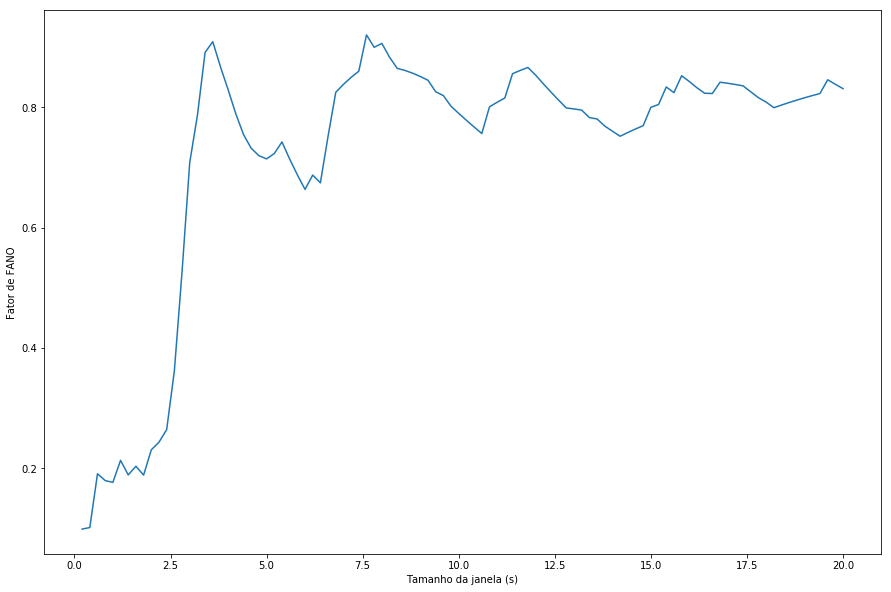

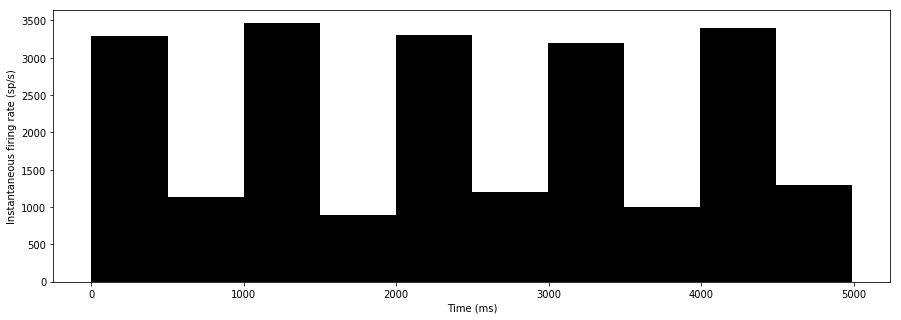

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()


aux=[]
win = []
fano = []
for k in range(100):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    b2.run(50*b2.ms)
    win.append(200000*ms*(k+1)*ms)
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    print(mean)
    var = np.var(aux)
    print(var)
    print("FANO: {}".format(var/mean))
    fano.append(var/mean)
plt.figure(figsize=(15,10))
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms, facecolor='k')
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');


[   1.2    1.2    1.2 ...,  199.7  199.7  199.7] ms
[14 14 14 14 14 13 13 14 14 14 14 14 14 14 14 14 14 13 13 14 14 14 14 14 13
 14 14 14 14 13 14 14 14 14 13 13 14 14 14 14 14 14 14 14 14 13 14 14 14 14
 14 14 14 14 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 13 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 13 14 14 14 14 14 14 14 13]
13.87
0.1131
FANO: 0.00815428983417
[ 202.5  202.5  202.5 ...,  395.2  395.2  395.2] ms
[15 14 15 15 14 15 15 15 15 15 15 15 15 15 15 15 14 15 15 15 15 14 15 15 15
 15 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 14 15 15 15 15 15 15
 14 15 14 14 15 15 15 14 15 14 14 14 14 15 15 15 15 15 15 15 15 15 14 15 14
 14 14 15 15 15 15 14 15 14 15 15 15 15 14 14 14 15 15 15 15 15 14 14 14 15]
14.3
0.34
FANO: 0.0237762237762
[ 0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036
  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036
  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036  0.4036

[ 0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096
  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096
  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096
  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096  0.6096
  0.6096  0.6096  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257
  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257
  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257  0.6257
  0.6257  0.6257  0.6395  0.6395  0.6395  0.6395  0.6395  0.6395  0.6395
  0.6395  0.6395  0.6395  0.6395  0.6395  0.6395  0.6395  0.6395  0.6395
  0.6395  0.6502  0.6502  0.6502  0.6502  0.6502  0.6502  0.6502  0.6502
  0.6502  0.6502  0.6502  0.6502  0.6502  0.6502  0.6502  0.6502  0.6502
  0.6502  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591
  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591
  0.6591  0.6591  0.6591  0.6591  0.6591  0.6591  0

[ 1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121
  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121
  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121  1.6121
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374  1.6374
  1.6374  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281
  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281
  1.7281  1.7281  1.7281  1.7281  1.7281  1.7281  1

[ 2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097  2.6097
  2.6097  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555
  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555
  2.6555  2.6555  2.6555  2.6555  2.6555  2.6555  2

[ 3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471  3.6471
  3.6471  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837
  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837
  3.6837  3.6837  3.6837  3.6837  3.6837  3.6837  3

[ 4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099  4.6099
  4.6099  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743
  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743
  4.6743  4.6743  4.6743  4.6743  4.6743  4.6743  4

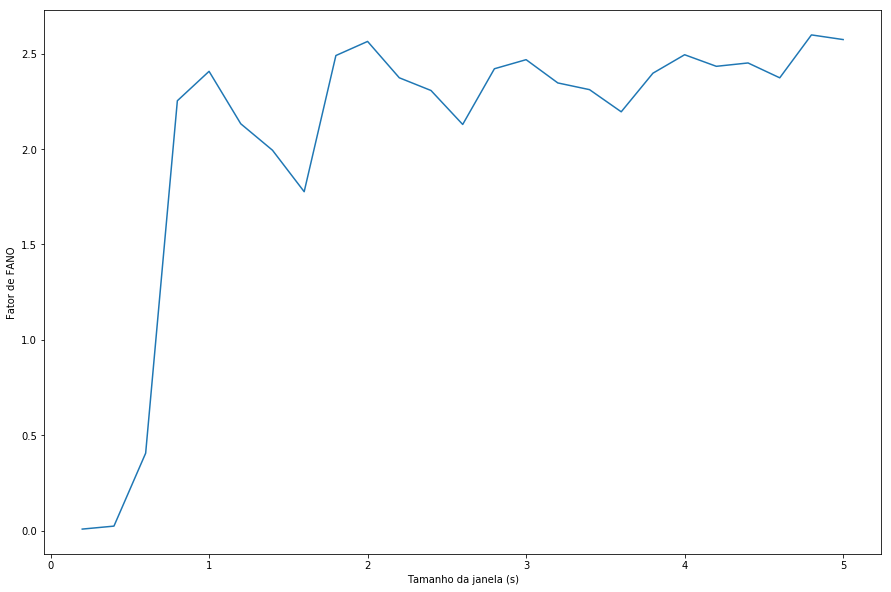

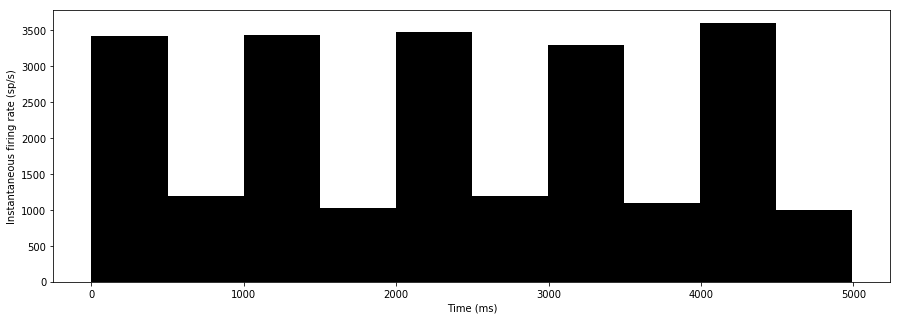

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()


aux=[]
win = []
fano = []
for k in range(25):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    b2.run(200*b2.ms)
    win.append(200000*ms*(k+1)*ms)
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    print(mean)
    var = np.var(aux)
    print(var)
    print("FANO: {}".format(var/mean))
    fano.append(var/mean)
plt.figure(figsize=(15,10))
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms, facecolor='k')
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');

[  1.8   1.8   1.8   1.8   1.8   1.8   1.8   9.5   9.5   9.5   9.5   9.5
   9.5   9.8   9.8   9.8   9.8   9.8   9.8   9.8   9.8   9.8   9.9   9.9
   9.9   9.9   9.9   9.9   9.9   9.9   9.9   9.9   9.9   9.9   9.9   9.9
   9.9  12.   12.   12.   12.   12.   12.   12.   12.   12.   12.1  12.1
  12.1  12.1  12.1  12.1  12.1  12.1  12.1  12.1  12.1  12.1  12.1  12.1
  12.1  12.1  12.5  12.5  12.5  12.5  12.5  12.5  12.5  12.5  12.5  12.5
  12.5  12.6  12.6  12.6  12.6  12.6  12.6  12.6  12.6  12.6  12.6  12.6
  12.6  14.4  14.4  14.4  14.4  14.4  14.4  14.4  14.4  14.4  14.4  14.4
  14.9  14.9  14.9  14.9  19.6  19.6  19.6  19.6  19.6  19.6  19.6  20.5
  20.5  20.5  20.5  20.5  20.5  21.4  21.4  21.4  21.4  21.4  21.4  21.4
  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.4
  21.4  21.4  21.4  21.4  21.4  24.4  24.4  24.4  24.4  24.4  24.4  24.4
  24.4  24.4  24.4  24.4  24.4  24.4  24.4  24.4  24.4  24.4  24.4  24.4
  24.4  24.4  24.4  24.4  24.4  24.4  26.9  26.9  2

[ 202.3  202.3  202.3  202.3  202.3  202.3  202.3  202.3  202.3  202.3
  202.3  202.3  202.3  212.5  212.5  212.5  212.5  212.5  212.5  212.5
  212.5  212.5  212.5  212.5  212.5  212.5  212.5  212.5  212.5  212.5
  212.5  212.5  212.5  212.5  212.5  212.5  212.5  217.7  217.7  217.7
  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7
  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7
  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7
  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7
  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7
  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7  217.7
  220.   220.   220.   220.   220.   220.   220.   220.   220.   220.   220.
  220.   220.   221.9  221.9  221.9  221.9  221.9  221.9  221.9  221.9
  221.9  221.9  221.9  221.9  221.9  221.9  221.9  221.9  221.9  221.9
  221.9  221.9  221.9  221.9  221.9  221.9  228.   228.   228.   228.  

[ 0.4018  0.4018  0.4018  0.4018  0.4018  0.4018  0.4018  0.4018  0.4018
  0.4018  0.4018  0.4018  0.4018  0.4041  0.4041  0.4041  0.4041  0.4041
  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041
  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041  0.4041
  0.4041  0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407
  0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407
  0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407
  0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407
  0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407
  0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407
  0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407   0.407
  0.407   0.4129  0.4129  0.4129  0.4129  0.4129  0.4129  0.4129  0.4129
  0.4129  0.4129  0.4129  0.4129  0.4129  0.4148  0.4148  0.4148  0.4148
  0.4148  0.4148  0.4148  0.4148  0.4148  0.4148  0.4148  

[ 0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103
  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103
  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103
  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103
  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103
  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103
  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103  0.7103
  0.7546  0.7546  0.7546  0.7546  0.7546  0.7546  0.7546  0.7546  0.7546
  0.7546  0.7546  0.7546  0.7546  0.7997  0.7997  0.7997  0.7997  0.7997
  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997
  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997  0.7997
  0.7997] s
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

[ 1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095
  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095
  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095
  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095
  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095
  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095
  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095  1.1095
  1.1153  1.1153  1.1153  1.1153  1.1153  1.1153  1.1153  1.1153  1.1153
  1.1153  1.1153  1.1153  1.1153  1.1186  1.1186  1.1186  1.1186  1.1186
  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186
  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186  1.1186
  1.1186  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228
  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228
  1.1228  1.1228  1.1228  1.1228  1.1228  1.1228  1

[ 1.3031  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031
  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031
  1.3031  1.3031  1.3031  1.3031  1.3031  1.3031  1.3052  1.3052  1.3052
  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052
  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052
  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052
  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052
  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052
  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052
  1.3052  1.3052  1.3052  1.3052  1.3052  1.3052  1.3094  1.3094  1.3094
  1.3094  1.3094  1.3094  1.3094  1.3094  1.3094  1.3094  1.3094  1.3094
  1.3094  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167
  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167
  1.3167  1.3167  1.3167  1.3167  1.3167  1.3167  1

[ 1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023
  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023
  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023
  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023
  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023
  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023
  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023  1.5023
  1.5046  1.5046  1.5046  1.5046  1.5046  1.5046  1.5046  1.5046  1.5046
  1.5046  1.5046  1.5046  1.5046  1.5114  1.5114  1.5114  1.5114  1.5114
  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114
  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114  1.5114
  1.5114  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221
  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221
  1.5221  1.5221  1.5221  1.5221  1.5221  1.5221  1

[ 2.0019  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019
  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019
  2.0019  2.0019  2.0019  2.0019  2.0019  2.0019  2.01    2.01    2.01
  2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01
  2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01
  2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01
  2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01
  2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01
  2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01    2.01
  2.01    2.01    2.01    2.01    2.01    2.01    2.0152  2.0152  2.0152
  2.0152  2.0152  2.0152  2.0152  2.0152  2.0152  2.0152  2.0152  2.0152
  2.0152  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209
  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209
  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209  2.0209  2.0328 

[ 2.2005  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005
  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005
  2.2005  2.2005  2.2005  2.2005  2.2005  2.2005  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179  2.2179
  2.2179  2.221   2.221   2.221   2.221   2.221   2.221   2.221   2.221
  2.221   2.221   2.221   2.221   2.221   2.221   2.221   2.221   2.221
  2.221   2.221   2.221   2.221   2.221   2.221   2.2

[ 2.4003  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003
  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003
  2.4003  2.4003  2.4003  2.4003  2.4003  2.4003  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158  2.4158
  2.4158  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181
  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181
  2.4181  2.4181  2.4181  2.4181  2.4181  2.4181  2

[ 2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176  2.7176
  2.7176  2.7176  2.7176  2.7176  2.7395  2.7395  2.7395  2.7395  2.7395
  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395
  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395  2.7395
  2.7395] s
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

[ 3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108   3.108
  3.108   3.108   3.108   3.108   3.1128  3.1128  3.1128  3.1128  3.1128
  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128
  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128  3.1128
  3.1128  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254
  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254
  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254  3.1254  3

[ 3.3004  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004
  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004
  3.3004  3.3004  3.3004  3.3004  3.3004  3.3004  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128  3.3128
  3.3128  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135
  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135
  3.3135  3.3135  3.3135  3.3135  3.3135  3.3135  3

[ 3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017  3.5017
  3.5017  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127
  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127
  3.5127  3.5127  3.5127  3.5127  3.5127  3.5127  3

[ 3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285  3.9285
  3.9285  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654
  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654
  3.9654  3.9654  3.9654  3.9654  3.9654  3.9654  3

[ 4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155  4.2155
  4.2155  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231
  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231
  4.2231  4.2231  4.2231  4.2231  4.2231  4.2231  4

[ 4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021  4.4021
  4.4021  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131
  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131
  4.4131  4.4131  4.4131  4.4131  4.4131  4.4131  4

[ 4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554  4.7554
  4.7554] s
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

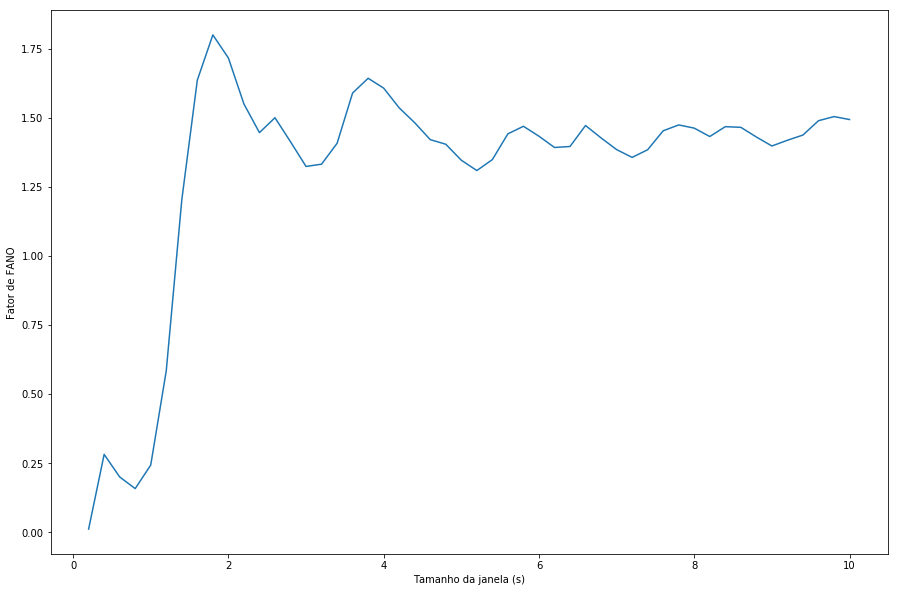

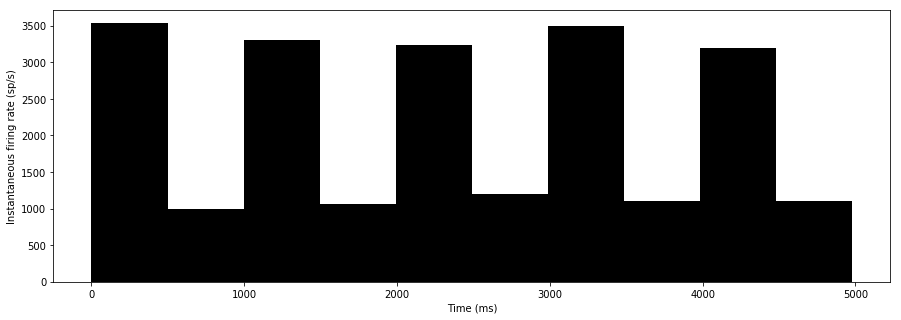

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()


aux=[]
win = []
fano = []
for k in range(50):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    b2.run(100*b2.ms)
    win.append(200000*ms*(k+1)*ms)
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    print(mean)
    var = np.var(aux)
    print(var)
    print("FANO: {}".format(var/mean))
    fano.append(var/mean)
plt.figure(figsize=(15,10))
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms, facecolor='k')
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');

[  1.7   1.7   1.7   1.7   1.7   1.7   6.9   6.9   6.9   6.9   6.9   6.9
   6.9   6.9   6.9   7.7   7.7   7.7   7.7   7.7   7.7   7.7   7.7   7.7
   7.7   7.7  10.8  10.8  10.8  10.8  10.8  10.8  10.8  10.8  10.8  10.8
  11.4  11.4  11.4  11.4  11.4  11.4  11.4  11.4  11.4  11.4  11.4  11.4
  11.4  11.4  11.4  11.4  11.4  11.4  11.4  11.4  11.4  13.1  13.1  13.1
  13.1  13.1  13.1  13.1  13.1  13.1  13.1  13.1  13.1  13.1  13.1  13.2
  13.2  13.2  13.2  13.2  13.2  13.2  13.2  13.2  15.   15.   15.   15.
  15.   15.   15.   17.9  17.9  17.9  17.9  17.9  17.9  17.9  17.9  17.9
  17.9  17.9  17.9  17.9  19.5  19.5  19.5  19.5  19.5  19.5  23.4  23.4
  23.4  23.4  23.4  23.4  23.4  23.4  23.4  24.   24.   24.   24.   24.
  24.   24.   24.   24.   24.   24.   27.8  27.8  27.8  27.8  27.8  27.8
  27.8  27.8  27.8  27.8  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9
  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9
  38.9  42.6  42.6  42.6  42.6  42.6  42.6  42.6  42.

[ 200.9  200.9  200.9  200.9  200.9  200.9  200.9  200.9  200.9  200.9
  200.9  200.9  200.9  200.9  200.9  200.9  200.9  200.9  200.9  200.9
  201.9  201.9  201.9  201.9  201.9  201.9  201.9  201.9  201.9  201.9
  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8
  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8
  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8
  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8
  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8  205.8
  205.8  208.4  208.4  208.4  208.4  208.4  208.4  208.4  208.4  208.4
  208.4  208.4  208.4  208.4  208.4  208.4  208.4  208.4  208.4  208.4
  210.6  210.6  210.6  210.6  210.6  210.6  210.6  210.6  210.6  210.6
  210.6  210.6  210.6  210.6  210.6  210.6  210.6  210.6  210.6  210.6
  212.6  212.6  212.6  212.6  212.6  212.6  212.6  212.6  212.6  212.6
  221.3  221.3  221.3  221.3  221.3  221.3  221.3  221.3  221.3  221.3
  221.

[ 0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025
  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025
  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025
  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025
  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025
  0.4025  0.4025  0.4025  0.4025  0.4025  0.4025  0.4048  0.4048  0.4048
  0.4048  0.4048  0.4048  0.4048  0.4048  0.4048  0.4048  0.4048  0.4048
  0.4048  0.4048  0.4048  0.4048  0.4048  0.4048  0.4048  0.4103  0.4103
  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103
  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103
  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103  0.4103
  0.4103  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194
  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194
  0.4194  0.4194  0.4194  0.4194  0.4194  0.4194  0

[ 0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735
  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735
  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735
  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735
  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735  0.735
  0.735  0.739  0.739  0.739  0.739  0.739  0.739  0.739  0.739  0.739
  0.739  0.739  0.739  0.739  0.739  0.739  0.739  0.739  0.739  0.739] s
[0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1]
5.1325
7.25994375
FANO: 1.41450438383
[ 0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052
  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052
  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052  0.8052
  0.8052  0.8052  0.8052  0.8431  0.843

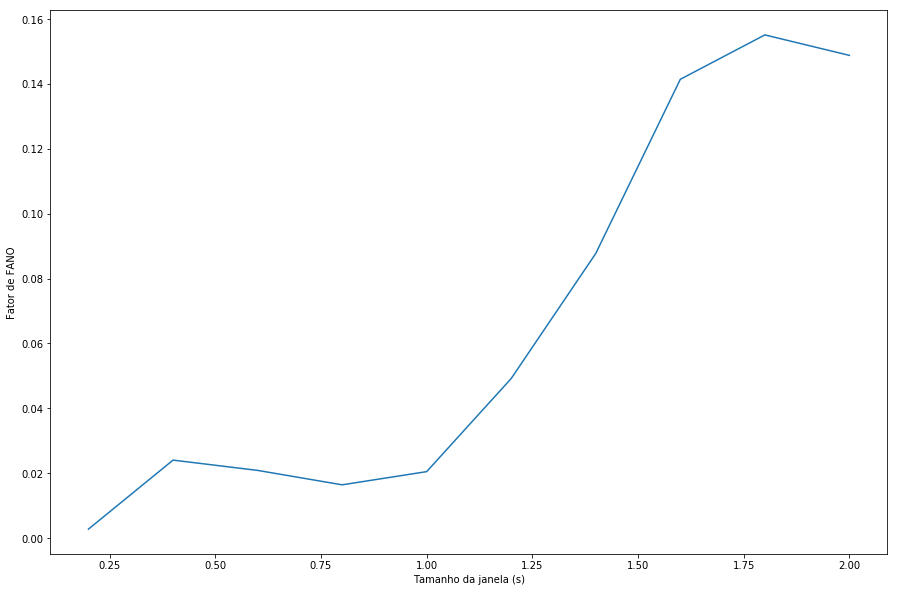

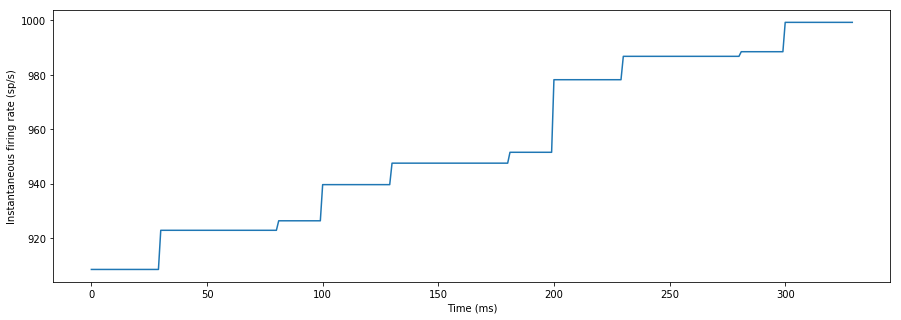

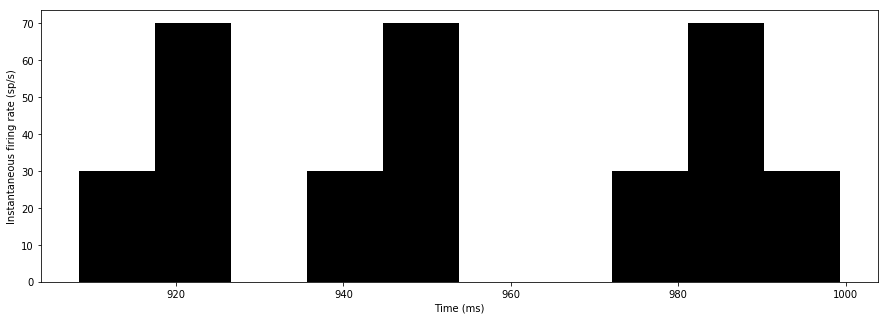

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()


aux=[]
win = []
fano = []
for k in range(10):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    b2.run(100*b2.ms)
    win.append(200000*ms*(k+1)*ms)
    print(spike_monitor.t[:])
    print(spike_monitor.count[:])
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    print(mean)
    var = np.var(aux)
    print(var)
    print("FANO: {}".format((var/mean)))
    fano.append((var/mean))
plt.figure(figsize=(15,10))
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()

fig = figure(figsize=(15, 5))
_ = plot(spike_monitor.t/ms)
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');

fig = figure(figsize=(15, 5))
_ = hist(spike_monitor.t/ms, facecolor='k')
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');




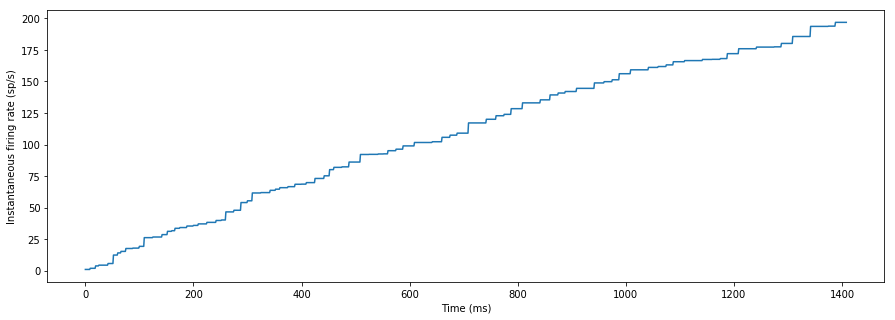

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()

state_monitor = b2.StateMonitor(G, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(G)
b2.run(200*b2.ms)


fig = figure(figsize=(15, 5))
_ = plot(spike_monitor.t/ms)
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');